# Sample code for Question 1

This notebook shows how you can use the provided Python function to pull player stats from an online website.
This function lives in a custom package that is provided to you in this repository.
You are encouraged to leverage this package as a skeleton and add all of your reusable code, functions, etc. into relevant modules.
This makes collaboration much easier as the package could be seen as a "single source of truth" to pull data, create visualizations, etc. rather than relying on a jumble of notebooks.
You can still run into trouble if branches are not frequently merged as work progresses, so try to not let your branches diverge too much.

In [ ]:
#@title Mount your Google Drive
# If you run this notebook locally or on a cluster (i.e. not on Google Colab)
# you can delete this cell which is specific to Google Colab. You may also
# change the paths for data/logs in Arguments below.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#@title Link your assignment folder & install requirements
#@markdown Enter the path to the assignment folder in your Google Drive
# If you run this notebook locally or on a cluster (i.e. not on Google Colab)
# you can delete this cell which is specific to Google Colab. You may also
# change the paths for data/logs in Arguments below.
import sys
import os
import shutil
import warnings

folder = "/content/gdrive/MyDrive/ift6758-project-template-v1.0/ift6758-project-template-main" #@param {type:"string"}
!ln -Ts "$folder" /content/ift6758-project > /dev/null

# Add the assignment folder to Python path
if '/content/ift6758-project' not in sys.path:
  sys.path.insert(0, '/content/ift6758-project')

# Install requirements
!pip install -qr /content/ift6758-project/requirements.txt

     |████████████████████████████████| 8.5 MB 5.2 MB/s 
     |████████████████████████████████| 428 kB 44.0 MB/s 
     |████████████████████████████████| 58 kB 4.7 MB/s 
     |████████████████████████████████| 393 kB 56.3 MB/s 
     |████████████████████████████████| 78 kB 5.8 MB/s 
     |████████████████████████████████| 52 kB 1.2 MB/s 
     |████████████████████████████████| 124 kB 45.8 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.1 which is incompatible.


In [ ]:
from ift6758.data import get_player_stats

If the above doesn't work for you, make sure you've installed the repo as specified in the readme file. 
Essentially you must make sure that your environment is setup (either through conda or virtualenv), and then install it using:

```bash
pip install -e /path/to/repo 
```

The nice thing using this approach is if you have your environment activated, you can import modules from anywhere on your system!

In [ ]:
df = get_player_stats(2016, 'goalies')

Retrieving data from 'https://www.hockey-reference.com/leagues/NHL_2016_goalies.html'...


If you're curious, this function uses the `pd.read_html()` method ([doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)), which internally uses [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to parse HTML data.

In [ ]:
df.head()

,Rk,Player,Age,Tm,GP,GS,W,L,T/O,GA,SA,SV,SV%,GAA,SO,GPS,MIN,QS,QS%,RBS,GA%-,GSAA,G,A,PTS,PIM
0,1,Jake Allen,25,STL,47,44,26,15,3,101,1260,1159,.920,2.35,6,8.2,2583,26,.591,6,94,6.28,0,0,0,0
1,2,Frederik Andersen,26,ANA,43,37,22,9,7,88,1086,998,.919,2.30,3,7.0,2298,24,.649,5,95,4.46,0,1,1,2
2,3,Craig Anderson,34,OTT,60,60,31,23,5,161,1915,1754,.916,2.78,4,11.6,3477,31,.517,8,99,2.05,0,2,2,0
3,4,Richard Bachman,28,VAN,1,1,1,0,0,3,31,28,.903,3.01,0,0.1,60,0,.000,0,NaN,NaN,0,0,0,0
4,5,Niklas Bäckström,37,CGY,4,3,2,2,0,13,109,96,.881,3.35,0,0.2,233,2,.667,1,NaN,NaN,0,0,0,0


# Question 1.1

In [ ]:
df_2018 = get_player_stats(2018, 'goalies')

Retrieving data from 'https://www.hockey-reference.com/leagues/NHL_2018_goalies.html'...


In [ ]:
df_2018 = df_2018.sort_values(by=['SV%'], ascending=False)
df_2018

,Rk,Player,Age,Tm,GP,GS,W,L,T/O,GA,SA,SV,SV%,GAA,SO,GPS,MIN,QS,QS%,RBS,GA%-,GSAA,G,A,PTS,PIM
27,29,Scott Foster,36,CHI,1,0,0,0,0,0,7,7,1.000,0.00,0,0.1,14,0,NaN,0,NaN,NaN,0,0,0,0
51,55,Marek Langhamer,23,ARI,1,0,0,0,0,0,10,10,1.000,0.00,0,0.2,29,0,NaN,0,NaN,NaN,0,0,0,0
88,95,Adam Wilcox,25,BUF,1,0,0,1,0,0,14,14,1.000,0.00,0,0.2,39,0,NaN,0,NaN,NaN,0,0,0,0
16,17,Oscar Dansk,23,VEG,4,3,3,0,0,5,93,88,.946,1.78,1,0.9,169,3,1.000,0,NaN,NaN,0,0,0,0
3,4,Ken Appleby,22,NJD,3,1,0,1,0,3,55,52,.945,1.45,0,0.5,124,0,.000,0,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,21,Thatcher Demko,22,VAN,1,1,1,0,0,4,30,26,.867,3.91,0,0.0,61,0,.000,0,NaN,NaN,0,0,0,0
50,54,Maxime Lagace,25,VEG,16,14,6,7,1,57,430,373,.867,3.92,0,0.3,874,5,.357,3,151,-19.26,0,0,0,0
67,74,Calvin Pickard,25,TOR,1,1,0,0,1,4,28,24,.857,3.83,0,0.0,63,0,.000,0,NaN,NaN,0,0,0,0
36,38,Brandon Halverson,21,NYR,1,0,0,0,0,1,6,5,.833,4.78,0,0.0,13,0,NaN,0,NaN,NaN,0,0,0,0


Issues:
- Highest SV% players have very low shots against (SA), so the sample size is very small. Larger sample sizes (larger SA) could provide more accurate SV%, and provide a smaller margin of error.

Fix issue:
- Only consider players who have at least the average SA? And then sort by SV%?

In [ ]:
# # df_2018['SA']
# SA_mean = df_2018['SA'].astype(float).mean()
# print(SA_mean)

# df_2018_large_SA = df_2018[df_2018['SA'].astype(float) > SA_mean]
# df_2018_large_SA_sorted_SV = df_2018_large_SA.sort_values(by=['SV%'], ascending=False)
# df_2018_large_SA_sorted_SV


# Question 1.2

851.2842105263157


Text(0, 0.5, 'Player')

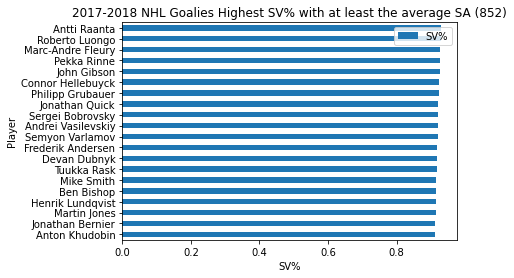

In [ ]:
import pandas as pd


# df_2018_top_20 = df_2018.head(20)
# df_2018_top_20 = df_2018_top_20.sort_values(by=['SV%'])
# print(df_2018_top_20)
# df_2018_top_20["SV%"] = df_2018_top_20["SV%"].astype(float)
# df_2018_top_20 = df_2018_top_20[['Player', 'SV%']]
# # print(df_2018_top_20)
# # pf = df_2018_top_20
# # print(list(df_2018_top_20.columns))

# # print(df_2018_top_20["SV%"])
# # print('print(pd.to_numeric(df_2018_top_20["SV%"]))')
# # print(pd.to_numeric(df_2018_top_20["SV%"]))
# df_2018_top_20 = pd.DataFrame({"SV%": pd.to_numeric(df_2018_top_20["SV%"]), "Player": df_2018_top_20["Player"]})
# ax = df_2018_top_20.plot.barh(y='SV%', x='Player', rot=0)

######
SA_mean = df_2018['SA'].astype(float).mean()
print(SA_mean)

df_2018_large_SA = df_2018[df_2018['SA'].astype(float) > SA_mean]
df_2018_large_SA_sorted_SV = df_2018_large_SA.sort_values(by=['SV%'], ascending=False)
df_2018_large_SA_sorted_SV_head_20 = df_2018_large_SA_sorted_SV.head(20)
df_2018_large_SA_sorted_SV_head_20_sorted_descending = df_2018_large_SA_sorted_SV_head_20.sort_values(by=['SV%'], ascending=True)
df_2018_large_SA_sorted_SV_head_20_sorted_descending = df_2018_large_SA_sorted_SV_head_20_sorted_descending[['Player', 'SV%']]

df_2018_large_SA_sorted_SV_head_20_sorted_descending = pd.DataFrame({"SV%": pd.to_numeric(df_2018_large_SA_sorted_SV_head_20_sorted_descending["SV%"]), "Player": df_2018_large_SA_sorted_SV_head_20_sorted_descending["Player"]})
ax = df_2018_large_SA_sorted_SV_head_20_sorted_descending.plot.barh(y='SV%', x='Player', rot=0, title='2017-2018 NHL Goalies Highest SV% with at least the average SA (852)')
ax.set_xlabel("SV%")
ax.set_ylabel("Player")


# Question 1.3

In determining a goalie's performance, other features that could potentially be useful may be Shots Against (SA), Goals-Against Average (GAA), Goalie Point Shares (GPS), and Games Played (GP) and Won (W).

Having a high SA would mean a larger sample size for SV%. Larger sample sizes (larger SA) could provide more accurate SV%, and provide a smaller margin of error.

<!-- SA alone does not tell the quality of every SA. Some games may have had a low SA, but very high quality of shots which the goalie saved with a high SV%.  -->

GAA calculates the number of goals allowed per 60 minutes played. So, the lower GAA, the better performance of the goalie.

GPS is an estimate of the number of points contributed by a player due to his play in goal. So beyond only metrics about the goals a goalie saved, this metric shows how many points they were able to help score. The higher GPA, the better performance of the goalie. 

At the end of the day, what matters after a game is winning. A goalie does a lot more to impact a game than what appears only in his post-game stats such as stopping "dump-ins". Therefore, a higher win percentage by calculating W/GP could also be potentially useful in determining a goalie's performance.

